# Изучим общую информацию


#### Экспорт данных и библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from scipy import stats as st

In [2]:
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')


#### Обзор датафрейма **calls**


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Всего в таблице 4 столбца которые которые показывают информацию по 202607 звонкам. Далее приведём столбец call_date к типу datetime.


In [4]:
calls.sample(20)

,id,call_date,duration,user_id
193600,1475_269,2018-05-12,14.12,1475
144589,1364_301,2018-10-03,0.00,1364
92214,1229_50,2018-12-12,12.51,1229
143705,1363_617,2018-11-29,5.50,1363
46189,1115_291,2018-07-28,14.04,1115
112507,1289_365,2018-09-29,2.85,1289
57746,1145_577,2018-08-23,13.54,1145
89491,1224_408,2018-12-23,1.40,1224
11773,1030_306,2018-09-01,9.48,1030
73521,1185_315,2018-12-14,15.22,1185



Бросаются в глаза звонки с нулевой длительностью и дробные. Возможно это недозвоны и звонки, которые по правилам компании не округлили до одной минуты

Посмотрим на срез таких звонков в промежутке до 1 минуты

In [5]:
calls.query('duration < 1')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
9,1000_9,2018-08-15,0.00,1000
...,...,...,...,...
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202596,1499_209,2018-12-16,0.00,1499


Внушительно! Почти 48 тысяч строк

Посмотрим сколько их останется после округления дробных звонков до одной минуты


In [6]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.query('duration < 1')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Всё ещё много. Так как эти звонки не тратят время и деньги, а значит не интересны для цели нашего исследования – беспощадно удаляем 

In [7]:
calls = calls.query("duration != 0.0")


#### Обзор датафрейма **internet**


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Всего в таблице 5 столбцов и 149396 сессий без пропусков. Далее приведём столбец session_date к типу datetime.

In [9]:
internet.sample(20)

,Unnamed: 0,id,mb_used,session_date,user_id
119843,119843,1403_398,369.90,2018-12-06,1403
93117,93117,1314_471,409.02,2018-08-06,1314
116809,116809,1393_295,627.80,2018-10-10,1393
7078,7078,1024_133,483.43,2018-12-30,1024
81396,81396,1275_179,0.00,2018-09-26,1275
3381,3381,1011_248,176.07,2018-11-07,1011
91424,91424,1309_6,157.87,2018-12-08,1309
135044,135044,1453_265,392.24,2018-05-22,1453
11886,11886,1042_17,436.44,2018-12-21,1042
118354,118354,1400_65,595.20,2018-12-12,1400


Тоже присутствуют нули и дробные значения. Принцип тот же, что и со звонками (перебои и разрывы, трафик не был использован)

In [10]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.query('mb_used < 1')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [11]:
internet = internet.query("mb_used != 0.0")


#### Обзор датафрейма **messages**


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Три столбца и 123036 строк данных. Данные полные, без пропусков, только изменим в столбце message_date тип на datetime

In [13]:
messages.sample(20)

,id,message_date,user_id
35130,1150_310,2018-09-07,1150
94091,1385_800,2018-09-21,1385
118866,1482_428,2018-10-25,1482
25338,1104_530,2018-06-11,1104
109405,1440_346,2018-11-18,1440
34043,1147_185,2018-09-25,1147
116969,1475_173,2018-07-07,1475
46426,1200_321,2018-08-04,1200
58736,1257_528,2018-06-24,1257
4426,1016_106,2018-12-01,1016


Ничего особенного, таблица как таблица


#### Обзор датафрейма **tariffs**


In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Всего в датафрейме 8 столбцов и две строки данных. Данные представлены в виде основных значений по тарифам

#### Обзор датафрейма **users**


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Всего в таблице 8 столбцов которые умещают 500 пользователей. Далее приведём столбец reg_date к типу datetime

In [17]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



Как уже было отмечено выше, если значение в столбце churn_date пропущено, значит тариф ещё действовал на момент выгрузки данных. Оставляем как есть. Только добавим далее столбцы месяца и времени года


Узнаем, сколько пропусков всего, кроме столбца churn_date

In [18]:
total_users = users.isnull().sum().sort_values(ascending = False)
percent_users = (users.isnull().sum() / users.isnull().count()).sort_values(ascending=False)
missing_users = pd.concat([total_users, percent_users], axis = 1, keys = ['Количество пропусков', 'Доля в %'])
missing_users['Тип данных признака'] = users.dtypes
display (missing_users)

,Количество пропусков,Доля в %,Тип данных признака
churn_date,462,0.924,object
tariff,0,0.000,object
reg_date,0,0.000,object
last_name,0,0.000,object
first_name,0,0.000,object
city,0,0.000,object
age,0,0.000,int64
user_id,0,0.000,int64


Кроме churn_date больше пропусков нет. Отлично

Узнаем, есть ли дубликаты

In [19]:

users['user_id'].duplicated().sum()

0

Дубликатов тоже нет!


# Подготовка данных




#### Изменение типа данных столбцов с датами и добавление столбцов с годом, месяцем и временем года 


Напишем функции и поменяем формат столбцов на datetime и добавим столбцы месяца и времени года


In [20]:

def set_season(date):
    if date.month in [1, 2, 12]:
        return 'зима'
    elif date.month in [3, 4, 5]:
        return 'весна'
    elif date.month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

def date_season(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['месяц'] = df[column].apply(lambda x: x.month)
                df['время года'] = df[column].apply(set_season)

In [21]:
date_season([users, calls, messages, internet])

Проверим, что получилось

In [22]:
calls.head()

,id,call_date,duration,user_id,месяц,время года
2,1000_2,2018-06-11,3.0,1000,6,лето
3,1000_3,2018-09-21,14.0,1000,9,осень
4,1000_4,2018-12-15,6.0,1000,12,зима
7,1000_7,2018-08-22,19.0,1000,8,лето
8,1000_8,2018-09-15,19.0,1000,9,осень


In [23]:
messages.head()

,id,message_date,user_id,месяц,время года
0,1000_0,2018-06-27,1000,6,лето
1,1000_1,2018-10-08,1000,10,осень
2,1000_2,2018-08-04,1000,8,лето
3,1000_3,2018-06-16,1000,6,лето
4,1000_4,2018-12-05,1000,12,зима


In [24]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,месяц,время года
0,0,1000_0,113.0,2018-11-25,1000,11,осень
1,1,1000_1,1053.0,2018-09-07,1000,9,осень
2,2,1000_2,1198.0,2018-06-25,1000,6,лето
3,3,1000_3,551.0,2018-08-22,1000,8,лето
4,4,1000_4,303.0,2018-09-24,1000,9,осень


In [25]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,месяц,время года
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,весна
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,осень
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,лето
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,лето
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,весна


Супер! Теперь будет удобнее делать подсчёты и смотреть на распределение

#### Для подсчёта затраченых ресурсов соберём в один датафрейм нужную нам информацию (df)

In [26]:
calls_season = calls.groupby(['user_id', 'время года', 'месяц'])['duration'].agg(['count', 'sum'])
messages_season = messages.groupby(['user_id', 'время года', 'месяц'])['id'].count()
internet_season = internet.groupby(['user_id', 'время года', 'месяц']).sum()['mb_used']

In [27]:
df = pd.concat([calls_season, messages_season, internet_season], axis=1)
df = df.reset_index()
df.head(15)

,user_id,время года,месяц,count,sum,id,mb_used
0,1000,весна,5,17.0,159.0,22.0,2256.0
1,1000,зима,12,38.0,333.0,70.0,9827.0
2,1000,лето,6,28.0,172.0,60.0,23257.0
3,1000,лето,7,41.0,340.0,75.0,14016.0
4,1000,лето,8,42.0,408.0,81.0,14070.0
5,1000,осень,9,46.0,466.0,57.0,14581.0
6,1000,осень,10,44.0,350.0,73.0,14717.0
7,1000,осень,11,37.0,338.0,58.0,14768.0
8,1001,зима,12,47.0,414.0,NaN,14053.0
9,1001,осень,11,45.0,430.0,NaN,18452.0


Добавим столбцы с тарифом, городом


In [28]:
map_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
df['Тариф'] = df['user_id'].map(map_tariff)

map_city = dict(pd.Series(users['city'].values, index=users['user_id']))
df['Город'] = df['user_id'].map(map_city)


Переименуем столбцы

In [29]:
df.columns = ['User_id', 'Время года', 'Месяц', 'Кол-во звонков, шт.', 'Звонки, мин.', 
                            'СМС, шт.', 'Интернет, Мб', 'Тариф', 'Город']

Смотрим на итог

In [30]:
df.head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар
8,1001,зима,12,47.0,414.0,NaN,14053.0,smart,Москва
9,1001,осень,11,45.0,430.0,NaN,18452.0,smart,Москва


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_id              3214 non-null   int64  
 1   Время года           3214 non-null   object 
 2   Месяц                3214 non-null   int64  
 3   Кол-во звонков, шт.  3168 non-null   float64
 4   Звонки, мин.         3168 non-null   float64
 5   СМС, шт.             2717 non-null   float64
 6   Интернет, Мб         3201 non-null   float64
 7   Тариф                3214 non-null   object 
 8   Город                3214 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 226.1+ KB


#### Заполнение пропусков




In [32]:
df[df['Интернет, Мб'].isnull()]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город
592,1094,весна,5,12.0,107.0,3.0,NaN,ultra,Новосибирск
1722,1273,весна,5,19.0,220.0,21.0,NaN,ultra,Курган
1723,1273,зима,12,38.0,260.0,39.0,NaN,ultra,Курган
1724,1273,лето,6,28.0,230.0,38.0,NaN,ultra,Курган
1725,1273,лето,7,30.0,253.0,37.0,NaN,ultra,Курган
1726,1273,лето,8,39.0,253.0,41.0,NaN,ultra,Курган
1727,1273,осень,9,28.0,223.0,32.0,NaN,ultra,Курган
1728,1273,осень,10,35.0,315.0,35.0,NaN,ultra,Курган
1729,1273,осень,11,31.0,272.0,29.0,NaN,ultra,Курган
2307,1365,осень,10,5.0,43.0,1.0,NaN,smart,Ростов-на-Дону



Пропуски есть в важных для нас столбцах. Вероятно, некоторые из пользователей за рассматриваемый период времени или ни разу не звонили, или ни разу не отправляли СМС, или ни разу не выходили в интернет. Посмотрим, нет ли у нас пользователей, которые ни разу не звонили, не отправляли смс и не заходили в интернет

In [33]:
df[(df['Интернет, Мб'].isnull()) & (df['СМС, шт.'].isnull()) &
                 (df['Звонки, мин.'].isnull())]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город


Таких нет, это значит, что каждый из пользователей активный, просто в какие-то периоды мог не пользоваться одним из типов связи.<br/><br/>
Поэтому проставим по имеющимся пропускам нули, которые будут означать, что в конкретном месяце данный клиент не звонил/не отправлял СМС/не пользовался интернетом:

In [34]:
df = df.fillna(0)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_id              3214 non-null   int64  
 1   Время года           3214 non-null   object 
 2   Месяц                3214 non-null   int64  
 3   Кол-во звонков, шт.  3214 non-null   float64
 4   Звонки, мин.         3214 non-null   float64
 5   СМС, шт.             3214 non-null   float64
 6   Интернет, Мб         3214 non-null   float64
 7   Тариф                3214 non-null   object 
 8   Город                3214 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 226.1+ KB


#### Сравнение количества пользователей и частоты использования тарифов и видов связи:


Посмотрим на то, какая часть клиентов использует тариф Смарт, а какая - Ультра

In [36]:
fig = px.pie(df, values='User_id', names='Тариф',
             title='Доля клиентов по тарифам',
             hover_data=['Тариф'], labels={'Тариф':'Тариф'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

69% клиентов пользуются тарифом Смарт.

Посмотрим на частоту использования ресурсов по каждому месяцу

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


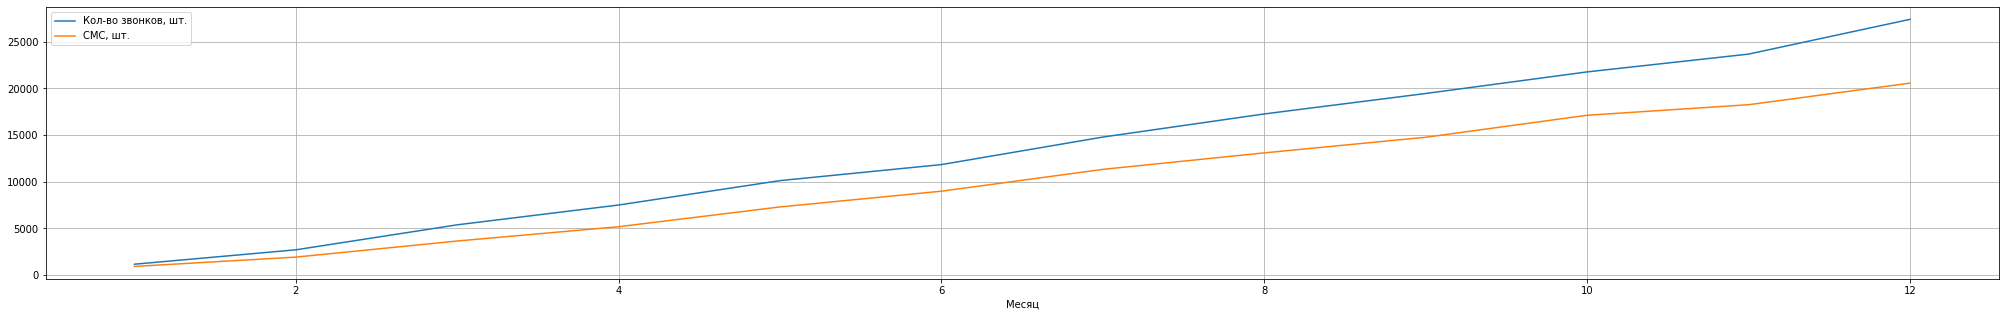

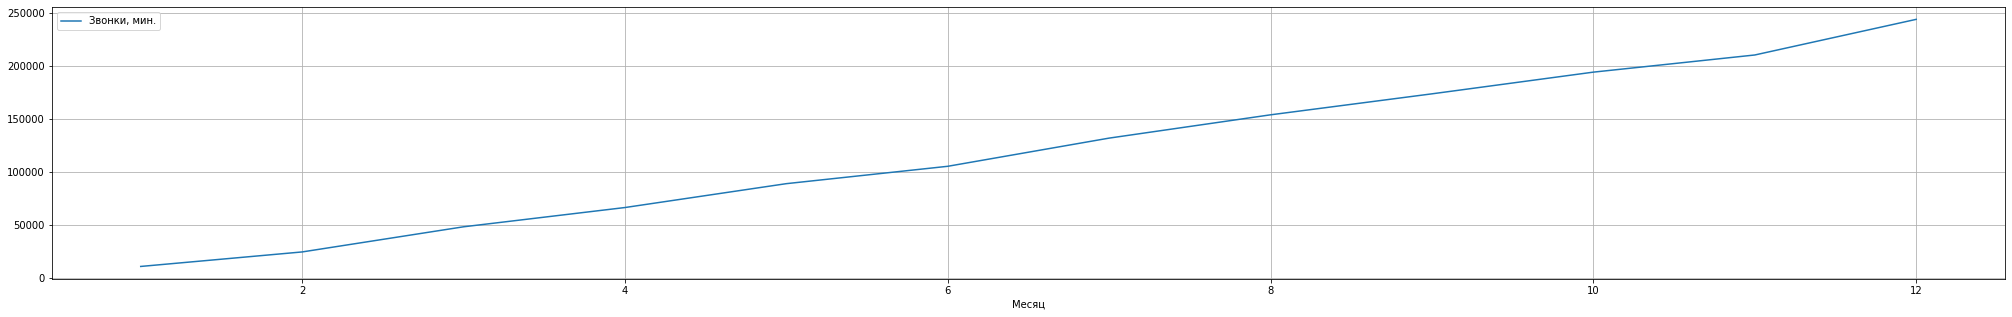

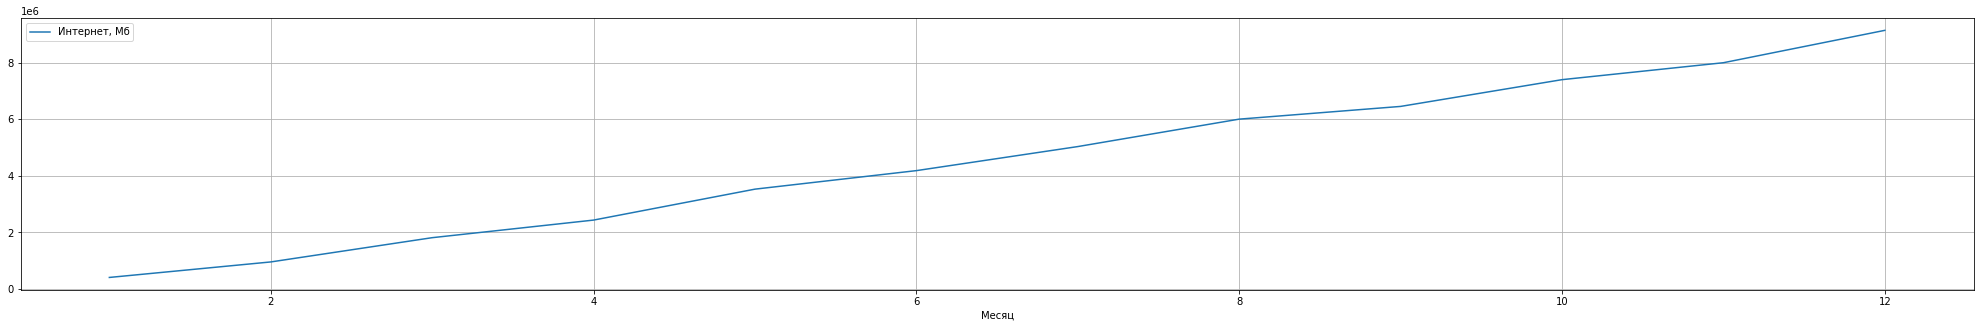

In [37]:
df['Месяц'].astype('int').abs()
print(df.pivot_table(index='Месяц', values=['Кол-во звонков, шт.', 'СМС, шт.'], aggfunc='sum').sort_values(by='Месяц', ascending = False).plot(grid=True, figsize=(35, 5)))
print(df.pivot_table(index='Месяц', values='Звонки, мин.', aggfunc='sum').sort_values(by='Месяц', ascending = False).plot(grid=True, figsize=(35, 5)))
print(df.pivot_table(index='Месяц', values='Интернет, Мб', aggfunc='sum').sort_values(by='Месяц', ascending = False).plot(grid=True, figsize=(35, 5)))

Количество ресурсов с каждым месяцем стремительно растёт

#### Добавление информации о помесячной выручке с каждого пользователя


Разобьем на 3 группы столбцов:
* "Аб. плата";
* "Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита";
* "Сумма за месяц".

 Для создания столбца "Аб. плата" создадим словарь и на его базе добавим новые данные

In [38]:
month_price = {'smart': 550, 'ultra': 1950}
df['Аб. плата'] = df['Тариф'].map(month_price)

Для создания столбцов "Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита" напишем функцию, которая будет считать превышения в зависимости от тарифа


In [39]:
def calls_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Звонки, мин.'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Звонки, мин.'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['СМС, шт.'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['СМС, шт.'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет, Мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет, Мб'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_revenue(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month += np.ceil(row['Минуты сверх']) * 3
        sum_per_month += row['СМС сверх'] * 3
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Минуты сверх']) * 1
        sum_per_month += row['СМС сверх'] * 1
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 150
        return sum_per_month

Создадим новые столбцы

In [40]:
df['Минуты сверх'] = df.apply(calls_over_plan, axis=1)
df['СМС сверх'] = df.apply(sms_over_plan, axis=1)
df['Мб сверх'] = df.apply(internet_over_plan, axis=1)

df['Плата сверх лимита, руб.'] = df.apply(month_revenue, axis=1)

for column in ['Минуты сверх', 'Мб сверх']:
    df[column] = df[column].astype('float')

for column in ['СМС сверх', 'Плата сверх лимита, руб.']:
    df[column] = df[column].astype('int')

Для создания столбца "Сумма за месяц" построчно просуммируем данные по 2 только что созданным столбцам: "Аб. плата" и "Плата сверх лимита"

In [41]:
df['Сумма за месяц, руб.'] = df['Аб. плата'] + df['Плата сверх лимита, руб.']

Смотрим на результат

In [42]:
df.head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Аб. плата,Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,1950,0.0,0,0.0,0,1950
8,1001,зима,12,47.0,414.0,0.0,14053.0,smart,Москва,550,0.0,0,0.0,0,550
9,1001,осень,11,45.0,430.0,0.0,18452.0,smart,Москва,550,0.0,0,3092.0,800,1350


#### Посмотрим, есть ли вообще клиенты, которые превышали лимиты

In [43]:
df[df['Сумма за месяц, руб.'] > 1950]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Аб. плата,Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
68,1009,лето,7,20.0,183.0,14.0,24752.0,smart,Пермь,550,0.0,0,9392.0,2000,2550
69,1009,лето,8,27.0,249.0,9.0,23738.0,smart,Пермь,550,0.0,0,8378.0,1800,2350
81,1011,зима,12,44.0,361.0,6.0,22900.0,smart,Самара,550,0.0,0,7540.0,1600,2150
84,1011,лето,8,58.0,515.0,15.0,21526.0,smart,Самара,550,15.0,0,6166.0,1445,1995
87,1011,осень,11,52.0,501.0,12.0,25332.0,smart,Самара,550,1.0,0,9972.0,2003,2553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1496,лето,8,62.0,527.0,41.0,23560.0,smart,Вологда,550,27.0,0,8200.0,1881,2431
3200,1496,осень,9,58.0,486.0,29.0,26970.0,smart,Вологда,550,0.0,0,11610.0,2400,2950
3201,1496,осень,10,56.0,450.0,35.0,28215.0,smart,Вологда,550,0.0,0,12855.0,2600,3150
3202,1496,осень,11,66.0,662.0,46.0,25092.0,smart,Вологда,550,162.0,0,9732.0,2486,3036


Такие есть. Посмотрим, какая часть клиентов "вылезает" за рамки ежемесячных лимитов по каждому из тарифов.


Анализ данных по переплатам (заказам доп. пакетов услуг).
Для удобства создадим колонку 'Не хватило тарифного плана' с признаком: "0" - клиент не превышал месячные лимиты тарифа, "1" - превышал.


In [44]:
df['Не хватило тарифного плана'] = np.where(df['Плата сверх лимита, руб.'] > 0, 1, 0)

#### Нарисуем круговую диаграмму по каждому из тарифов, чтобы увидеть, какая часть пользователей "дозаказывает" услуги после истечения месячных лимитов по тарифу

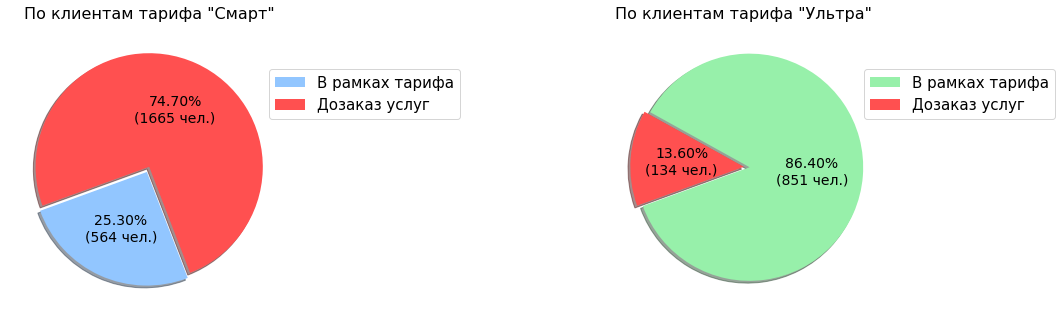

In [45]:
filter_list = ['smart', 'ultra']
titles_list = ['По клиентам тарифа "Смарт"', 'По клиентам тарифа "Ультра"']
rows = 1
cols = 2
filter_list_counter = 0

sum_smart = df[df['Тариф'] == 'smart'].count()['User_id']
sum_ultra = df[df['Тариф'] == 'ultra'].count()['User_id']

annot_labels = ['В рамках тарифа', 'Дозаказ услуг']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_smart)
    else:
        value = float(pct/100.*sum_ultra)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

for r in range(rows):
    for c in range(cols):
        if filter_list[filter_list_counter] == 'smart':
            colors = ['#92c6ff', '#ff5050']
        else:
            colors = ['#97F0AA', '#ff5050']
        curr_filtered_df = df[df['Тариф'] == filter_list[filter_list_counter]].groupby('Не хватило тарифного плана')['User_id']
        ax = curr_filtered_df.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True, explode=explode,
                                           title=titles_list[filter_list_counter], pctdistance=0.55, figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), startangle=200, ax=axes[c], colors=colors,
                                           labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['В рамках тарифа', 'Дозаказ услуг'], bbox_to_anchor=(0.897,0.87), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)
    ax.title.set_position([0.5, 1.15])

Видим, что по тарифу Смарт примерно в 74% случаев клиенту не хватает заложенных в абонентскую плату минут, СМС или гигабайт, и он "дозаказывает" эти услуги.
И наоборот, почти всем клиентам с тарифом Ультра всегда всего хватает, кроме 13% - они тоже "дозаказывают" услуги вне поверх абонентской платы.

#### Посмотрим на гистограмму "переплат" клиентов тарифа Смарт

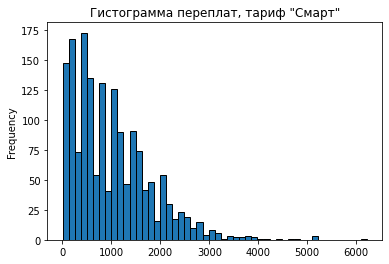

In [46]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered = df[(df['Тариф'] == 'smart') & 
                               (df['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50)

Большинство переплачивает до 1200 рублей. Это довольно много, учитывая, что размер абонентский платы - 550 рублей.<br/>
Посмотрим ближе

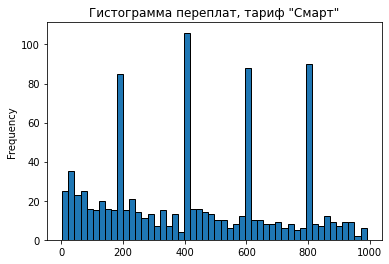

In [47]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered_less1000 = df[(df['Тариф'] == 'smart') & 
                                        (df['Плата сверх лимита, руб.'] > 0) &
                                        (df['Плата сверх лимита, руб.'] < 1000)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, ec='black', bins=50)

Большая часть клиентов если переплачивает, то переплачивает сумму, кратную 200 рублям. То есть дозаказывают разное количество раз 1 Гб интернета за 200 рублей.

#### Посмотрим на гистограмму "переплат" клиентов тарифа Ультра

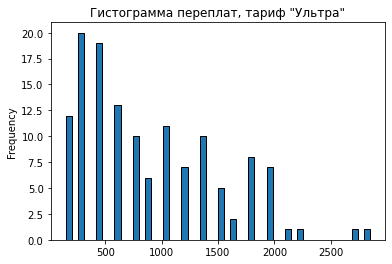

In [48]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered = df[(df['Тариф'] == 'ultra') & 
                               (df['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50)

В основном, переплаты до 1500 рублей. Посмотрим поближе

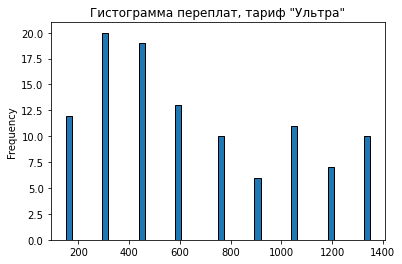

In [49]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered_less1000 = df[(df['Тариф'] == 'ultra') & 
                                        (df['Плата сверх лимита, руб.'] > 0) &
                                        (df['Плата сверх лимита, руб.'] < 1500)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, ec='black', bins=50)

Переплачивают по 150р. за дополнительный 1 Гб интернет-трафика различное количество раз.

#### Какие услуги чаще дозаказывают пользователи каждого из тарифов


In [50]:
(df.groupby('Тариф').sum()[['Минуты сверх', 'СМС сверх', 'Мб сверх']]).reset_index()

,Тариф,Минуты сверх,СМС сверх,Мб сверх
0,smart,92739.0,12928,6175667.0
1,ultra,0.0,0,743233.0


Пользователи тарифа Смарт доказывают услуги каждого типа связи. Пользователи тарифа Ультра - только интернет.

#### Сравнение суммарную выручку за год по каждому из тарифов


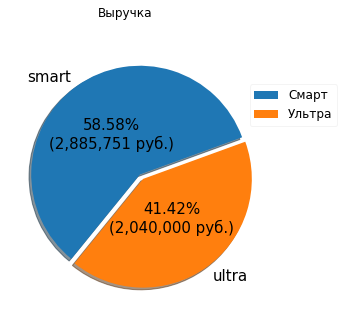

In [51]:
all_revenue = df['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

58% выручки приносят клиенты, пользующиеся тарифом Смарт.
Взяли количеством.

Сводная таблица по полученным о тарифах данным:

<html>
<body>
<table border="1" cellspacing="0" cellpadding="0">
<tr>
<td> &nbsp; </td>
<td colspan=2 style="text-align:center;"><b>Кол-во абонентов</b></td>
<td colspan=2 style="text-align:center;"><b>Звонки</b></td>
<td colspan=2 style="text-align:center;"><b>СМС</b></td>
<td colspan=2 style="text-align:center;"><b>Интернет</b></td>
<td colspan=2 style="text-align:center;"><b>Выручка</b></td>    
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td style="color:#16B4DC; font-size: 15px;" ><b>69,3 % </b></td>
<td>2229 чел.</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>64,2 % </b></td>
<td>931 577 мин</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>60,5 % </b></td>
<td>74413 шт.</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>65,3 % </b></td>
<td>35 327 Гб</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>58,6 % </b></td>
<td>2,89 млн руб.</td>
</tr>
<tr>
    <td style="background-color:#97F0AA; font-size: 12px;"> <b>Тариф "Ультра"</b></td>
<td>30,7 %</td>
<td>985 чел. </td>
<td>35,8 %  </td>
<td>518 724 мин</td>
<td>39,5 %  </td>
<td>48623 шт.</td>
<td>34,7 %  </td>
<td>18 745 Гб</td>
<td>41,4 % </td>
<td>2,04 млн руб.</td>
</tr>
</table>
</body>
</html>

Больше людей пользуются тарифом Смарт, больше трафика проходит через тариф Смарт, больше отправляется смс и больше совершается звонков, и, как следствие, большую часть выручки приносит тариф Смарт, даже несмотря на что, что абонентская плата по тарифу Ультра в 3 раза выше.


# Анализ поведения клиента


Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Получаем информацию о выбросах по каждому из набора данных.
Сначала построим boxplot'ы по всем рассматриваемым данным (длительность звонка, количество отправленных СМС, объем использованного интернет-трафика), чтобы зафиксировать выбросы и отфильтровать их при дальнейшем анализе. Сначала зададим нижнее и верхнее значения усов через 2 и 98 квантили и построим один boxplot, потом построим boxplot со стандартным межквартильным размахом, равным 1,5

Напишем под это функцию

In [52]:
def plot_box(whis):
    column_list = ['Звонки, мин.', 'СМС, шт.', 'Интернет, Мб']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = df.boxplot(column=column_list[column_list_counter], by='Тариф', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, whis=whis)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            plt.suptitle('Boxplot с whis = {}'.format(whis), y=1, fontsize=45, fontweight='bold')
            column_list_counter += 1

whis = [2,98]:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



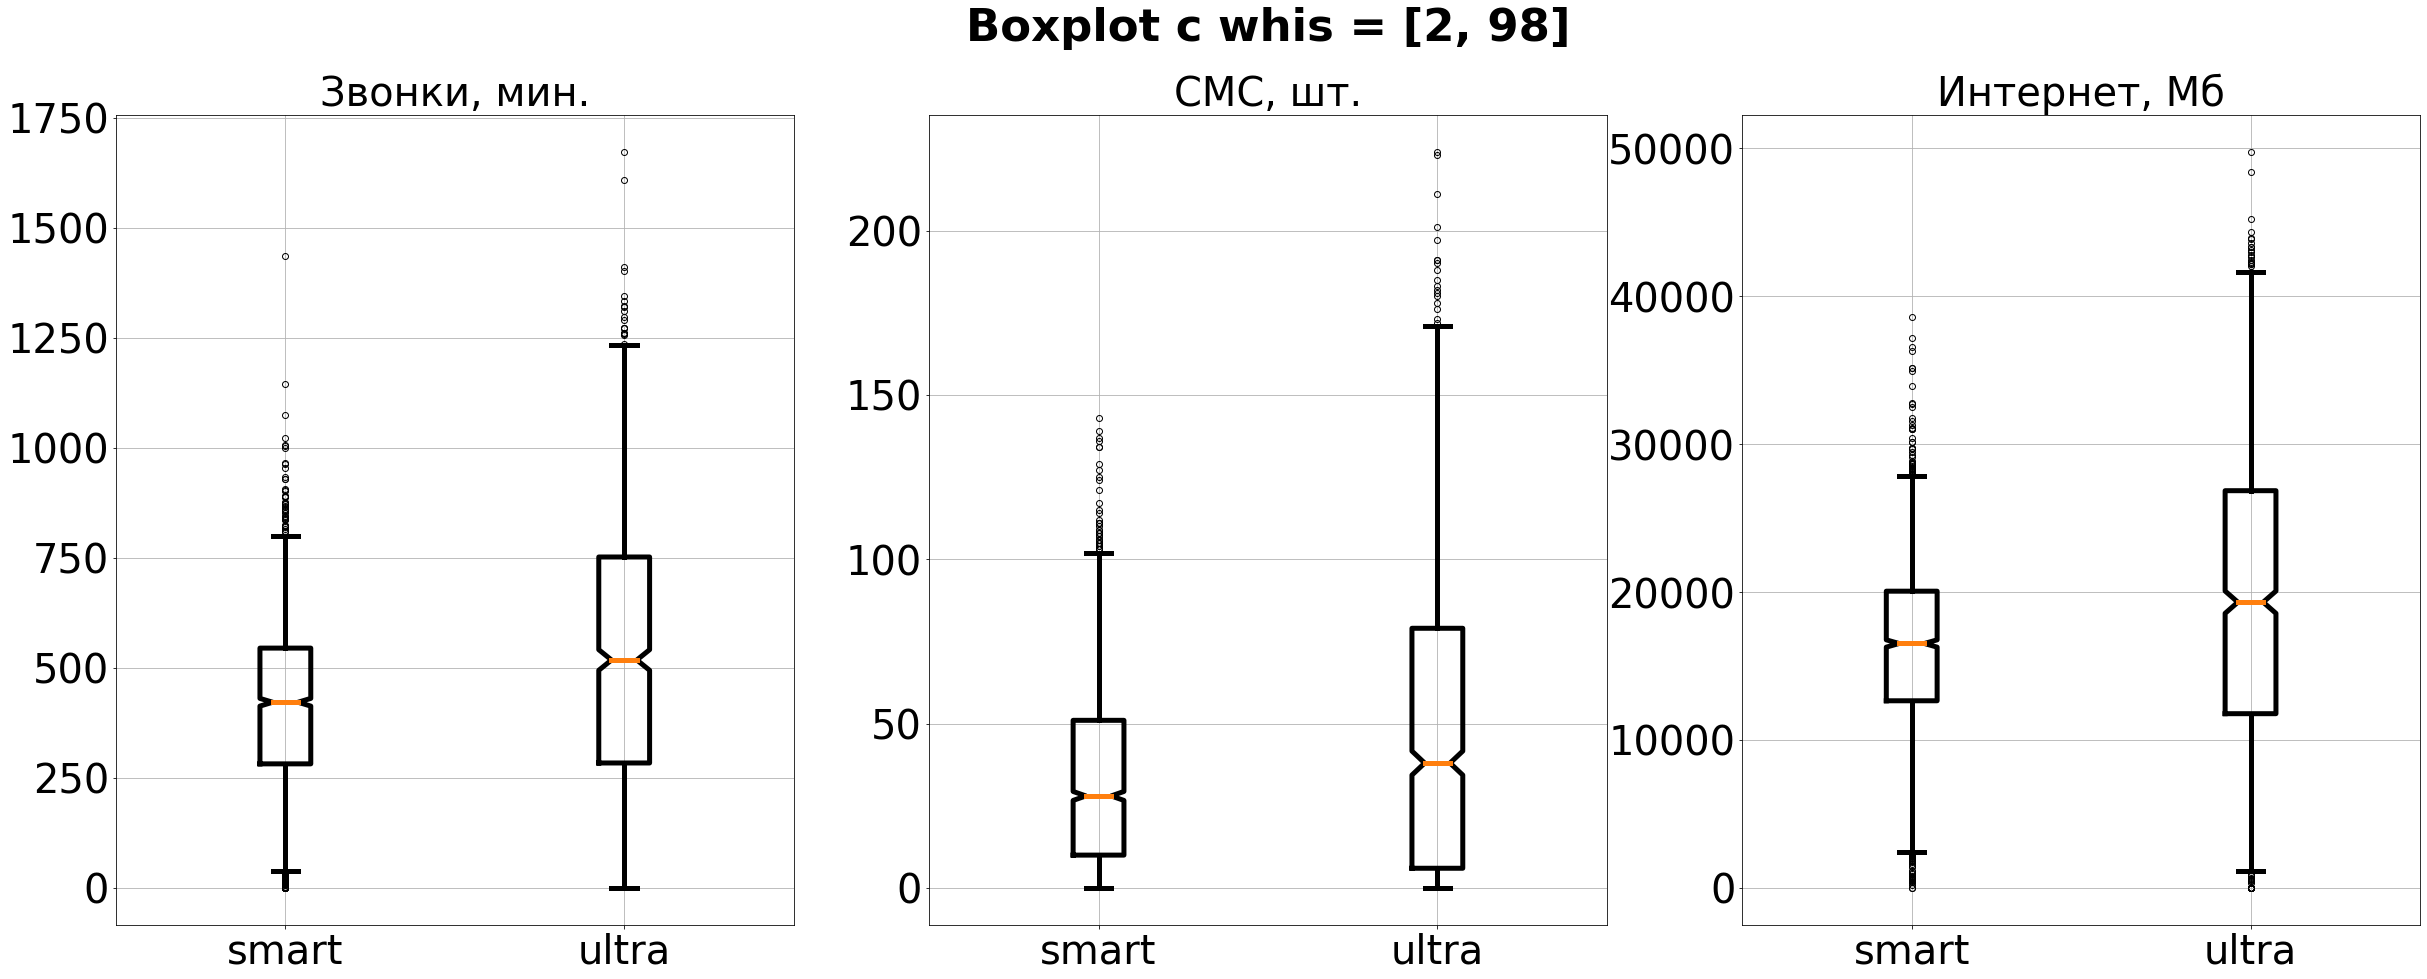

In [53]:
plot_box([2,98])

whis = 1,5:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



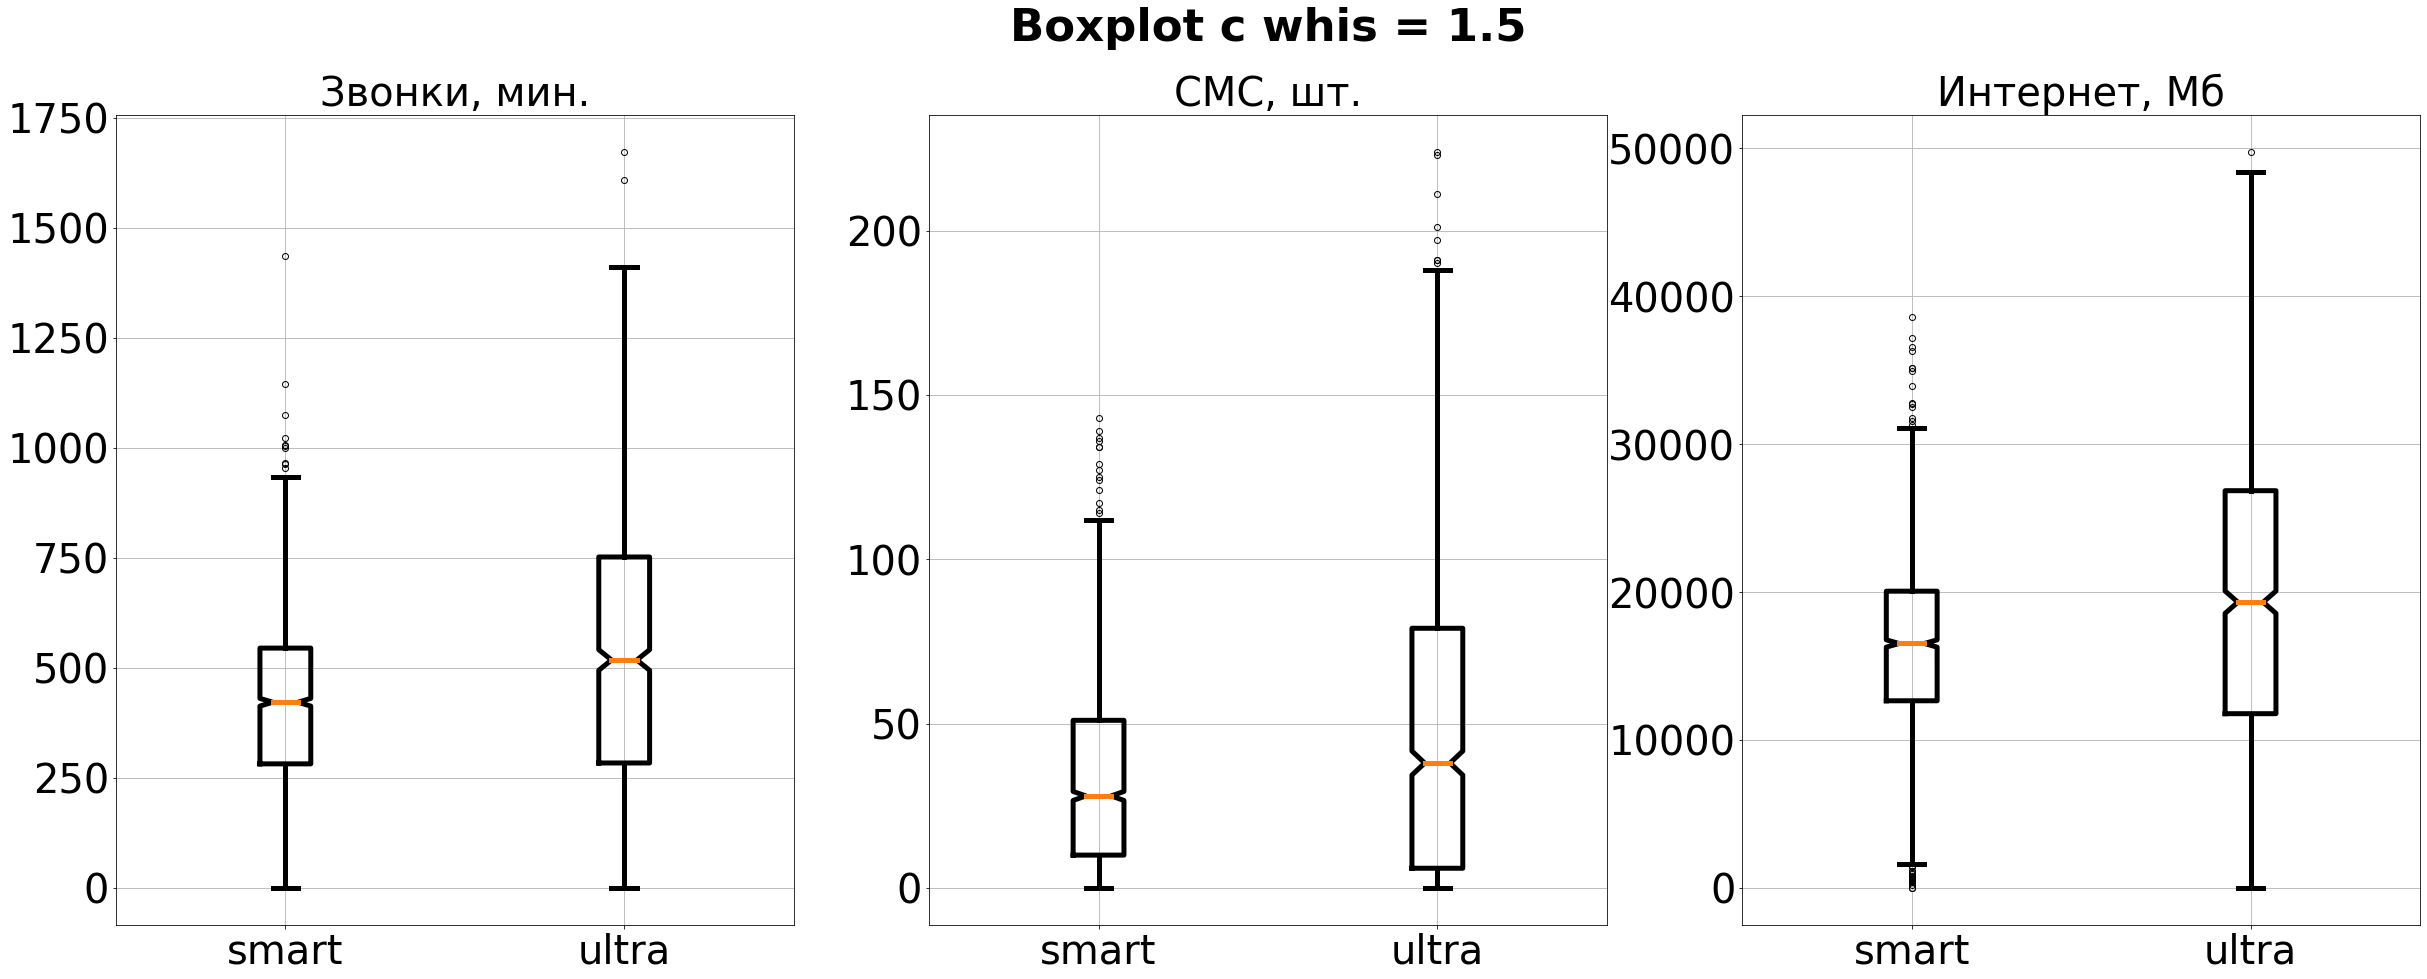

In [54]:
plot_box(1.5)

При параметре whis = 1,5 аномалий отбрасывается меньше, другими словами, мы бережней фильтруем данные, чем при [2,98].
В связи с этим, определим интервалы данных по boxplot'ам с whis = 1,5.

#### Определение интервалов данных для последующей их фильтрации

Для этого напишем функцию

In [55]:
def get_intervals(column, data_filter):
    
    if data_filter == 'Тариф':
        format_name = column
        data1, data2 = 'smart', 'ultra'
        format_end1 = 'тарифа "Смарт"'
        format_end2 = 'тарифа "Ультра"'
    elif data_filter == 'is_Moscow':
        format_name = 'is_Moscow'
        data1, data2 = 0, 1
        format_end1 = 'для регионов'
        format_end2 = 'для Москвы'
    
    q1_1 = df[df[data_filter] == data1][column].quantile(0.25)
    q3_1 = df[df[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    if data_filter == 'is_Moscow':
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    else:
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    
    right_int_1 = np.where( (q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = df[df[data_filter] == data2][column].quantile(0.25)
    q3_2 = df[df[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    if data_filter == 'is_Moscow':
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    else:
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
        
    right_int_2 = np.where( (q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)

#### Найдем границы интервала по длительности звонков

In [56]:
calls_int_smart, calls_int_ultra = get_intervals('Звонки, мин.', 'Тариф')

Границы интервала для столбца "Звонки, мин." тарифа "Смарт": 0.0 - 939.5
Границы интервала для столбца "Звонки, мин." тарифа "Ультра": 0.0 - 1454.0


#### Найдем границы интервала по количеству отправленных СМС

In [57]:
sms_int_smart, sms_int_ultra = get_intervals('СМС, шт.', 'Тариф')

Границы интервала для столбца "СМС, шт." тарифа "Смарт": 0.0 - 112.5
Границы интервала для столбца "СМС, шт." тарифа "Ультра": 0.0 - 188.5


#### Найдем границы интервала по количеству использованного трафика

In [58]:
internet_int_smart, internet_int_ultra = get_intervals('Интернет, Мб', 'Тариф')

Границы интервала для столбца "Интернет, Мб" тарифа "Смарт": 1543.0 - 31183.0
Границы интервала для столбца "Интернет, Мб" тарифа "Ультра": 0.0 - 49480.0


#### Построим гистограммы по тарифам по длительности звонков, по количеству отправленных смс, по количеству потраченного интернет-трафика. Помимо этого, выведем на расчетные данные по среднему, дисперсии и стандартному отклонению

Напишем для этого функцию

In [59]:
def plot_hist_comparison(data):
    
    ax = plt.gca()
    func_dict = {'Звонки': 'Звонки, мин.', 'СМС': 'СМС, шт.', 'Интернет': 'Интернет, Мб'}
    xlims = [(calls_int_smart[0], calls_int_smart[1]), (calls_int_ultra[0], calls_int_ultra[1]),
             (sms_int_smart[0], sms_int_smart[1]), (sms_int_ultra[0], sms_int_ultra[1]),
             (internet_int_smart[0], internet_int_smart[1]), (internet_int_ultra[0], internet_int_ultra[1])]
    
    filt_column = func_dict[data]

    if data == 'Звонки':
        title = 'Гистограмма длительности звонков, мин.'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        text_x = (58, 8)
        text_y = 118
        count_text_x = 1150
        count_text_y = 75
        alpha = 0.8

    elif data == 'СМС':
        title = 'Гистограмма количества отправленных СМС, шт.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
        text_x = (5.5, 1)
        text_y = 200
        count_text_x = 148
        count_text_y = 230
        alpha = 1

    else:
        title = 'Гистограмма количества использованного интернет-трафика, Мб'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
        text_x = (3300, 200)
        text_y = 130
        count_text_x = 38000
        count_text_y = 82
        alpha = 0.8

    
    # получаем отфильтрованные от выбросов датафреймы
    filtered_smart_data = df[(df['Тариф'] == 'smart') &
                                           (df[filt_column] >= xlim1[0]) &
                                           (df[filt_column] <= xlim1[1])][filt_column]
    filtered_ultra_data = df[(df['Тариф'] == 'ultra') &
                                           (df[filt_column] >= xlim2[0]) &
                                           (df[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filtered_smart_data.plot(kind='hist', bins=40, figsize=(12,6), ec='black', ax=ax, color='#92c6ff', 
                             title=title, xlim=xlim1)
    filtered_ultra_data.plot(kind='hist', bins=70, figsize=(12,6), ec='black', ax=ax, color='#97F0AA', 
                             title=title, xlim=xlim2, alpha=alpha)
    
    # расчетные данные
    mean_smart = filtered_smart_data.mean()
    mean_ultra = filtered_ultra_data.mean()
    dispersion_smart = filtered_smart_data.var()
    dispersion_ultra = filtered_ultra_data.var()
    std_smart = filtered_smart_data.std()
    std_ultra = filtered_ultra_data.std()
    
    if data == 'СМС':
        smart_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    else:
        smart_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    # рисуем медианы
    plt.axvline(x=filtered_smart_data.median(),linewidth=3, color='#16B4DC', linestyle='--')
    ax.text(filtered_smart_data.median()-text_x[0], text_y, '{0:.0f}'.format(filtered_smart_data.median()), 
            fontweight='bold', fontsize='large')
    plt.axvline(x=filtered_ultra_data.median(),linewidth=3, color='#35B815', linestyle='--')
    ax.text(filtered_ultra_data.median()+text_x[1], text_y, '{0:.0f}'.format(filtered_ultra_data.median()), 
            fontweight='bold', fontsize='large')
    
    plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})
    ax.text(count_text_x, count_text_y, 'Расчетные данные', fontweight='bold', fontsize='large')
    


Гистограмма длительности звонков


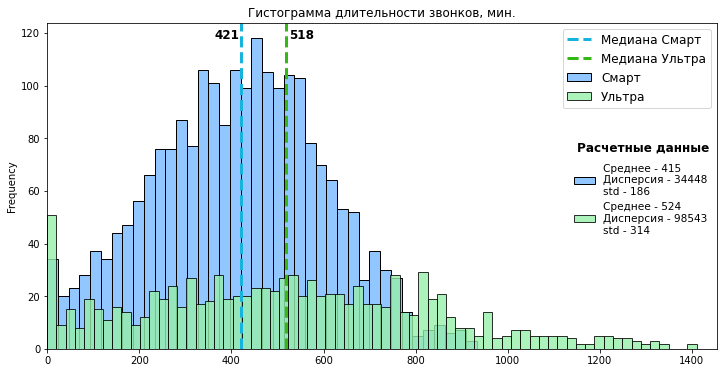

In [60]:
plot_hist_comparison('Звонки')

В основном, на тарифе Смарт люди разговаривают в месяц в течение 250-550 минут. Причем медиана равна 421 минуте, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи.
С тарифом Ультра немного иная ситуация - большая часть пользователей вообще не разговаривает голосом. Из тех, кто разговаривает, в среднем наговаривают 518 минут.
По итогу, медиана тарифа Ультра больше, чем медиана Смарт.

Гистограмма количества отправленных СМС

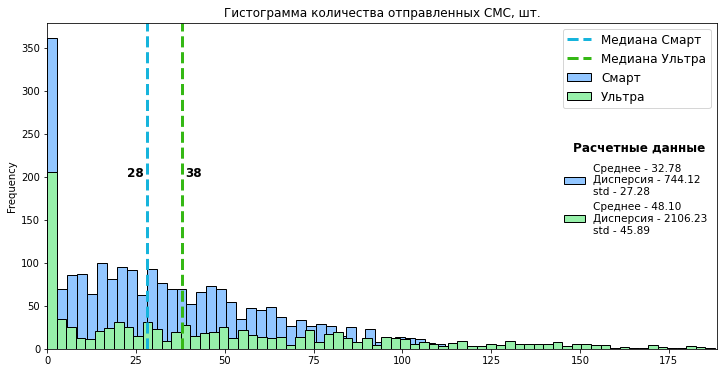

In [61]:
plot_hist_comparison('СМС')

По обоим тарифам ситуация схожая - большая часть пользователей не отправляет СМС сообщения.
Однако, из тех, кто отправляет, большую активность проявляют пользователи тарифа Смарт - в среднем они отправляют до 30 СМС в месяц. Пользователи тарифа Смартотправляют до 50 СМС.

Гистограмма использованного интернет-трафику


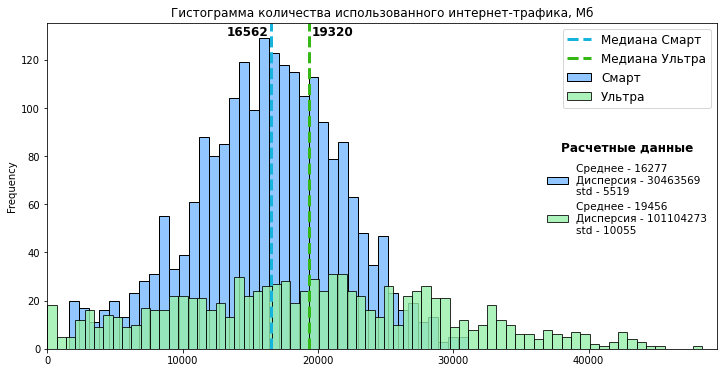

In [62]:
plot_hist_comparison('Интернет')

Клиенты с тарифом Смарт в среднем в месяц используют от 14 до 20 Гб трафика. Причем медиана равна 16,5 Гб, что "вылезает" за пределы, установленные абонентской платой - в 15 Гб. Фактически, клиенты тарифа Смарт регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается.
Клиенты с тарифом Ультра активней пользуются интернетом - медиана равна 19 Гб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.


# Проверка гипотез



#### Первая гипотеза о равенстве средних двух генеральных совокупностей
средняя выручка пользователей тарифов Ультра и Смарт различается.

H0 (нулевая гипотеза)- предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей тарифа Смарт не отличаетсяот средней выручки пользователей тарифа Ультра. H1 (альтернативная гипотеза) - средняя выручка пользователей тарифа Смарт отличается от средней выручки пользователей тарифа Ультра.

Формирование выборок без аномалий


Посмотрим на выбросы

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Text(0.5, 0.93, 'Boxplot по выручке с whis = 1,5')

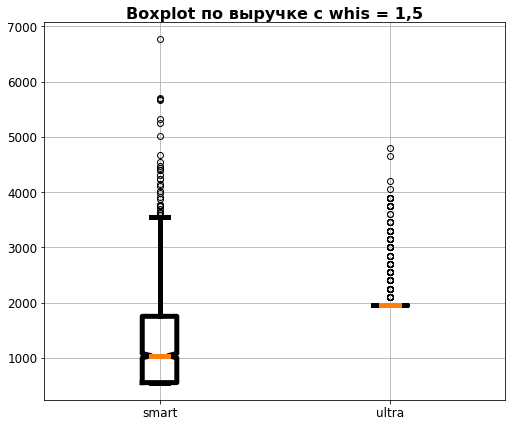

In [63]:
ax = df.boxplot(column='Сумма за месяц, руб.', by='Тариф', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))
ax.set_title('')
ax.title.set_size(40)
ax.set_xlabel('')
plt.suptitle('Boxplot по выручке с whis = 1,5', y=0.93, fontsize=16, fontweight='bold')

Посчитаем границы интервалов

In [64]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'Тариф')

Границы интервала для столбца "Сумма за месяц, руб." тарифа "Смарт": 0.0 - 3550.0
Границы интервала для столбца "Сумма за месяц, руб." тарифа "Ультра": 1950.0 - 1950.0


Выберем нужные нам данные - среднюю месячную выручку по тарифам Смарт и Ультра

In [65]:
smart_mean_revenue = df[(df['Тариф'] == 'smart') &
                                      (df['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                      (df['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

ultra_mean_revenue = df[(df['Тариф'] == 'ultra') &
                                      (df['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                      (df['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

Расчет p-value:

Т.к. выборки у нас независимые, воспользуемся функцией ttest_indиз модуля scipy.stats

In [66]:
from scipy.stats import ttest_ind

In [67]:
stat, p = ttest_ind(smart_mean_revenue, ultra_mean_revenue)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -27.932596508963062
p-value = 4.6244593529e-153

Пороговое значение alpha = 0.05


**Вывод**

Нулевую гипотезу отвергаем. Верно утверждение, что средняя выручка пользователей тарифов Смарт и Ультра различается.
Посмотрим, в чью пользу

In [68]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.2f}'.format(smart_mean_revenue.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {}'.format(ultra_mean_revenue.mean()))

Средняя выручка по пользователям тарифа "Смарт" - 1249.74
Средняя выручка по пользователям тарифа "Ультра" - 1950.0


Ожидаемо, что пользователи тарифа "Ультра" в среднем приносят больше денег, т.к. их абонентская плата в 3,5 раза выше, чем абонентская плата пользующихся тарифом Смарт (1950р. против 550р.). Клиенты с тарифом Смарт, конечно, довольно часто (в 75% случаев) "вылезают" за пределы своего тарифа и заказывают доп. услуги, но всё равно не догоняют по тратам на пользователя клиентов с тарифом Ультра.


#### Вторая гипотеза о равенстве средних двух генеральных совокупностей

(средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов)

Выберем нужные нам данные - среднюю месячную выручку по Москве и по остальным регионам

Проставим признак по каждой строке - Москва или регион

In [69]:
df['is_Moscow'] = np.where(df['Город'] == 'Москва', 1, 0)

Построим boxplot'ы для вычисления выбросов

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



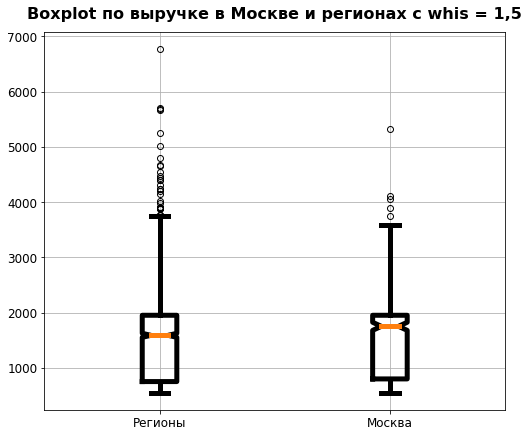

In [70]:
ax = df.boxplot(column='Сумма за месяц, руб.', by='is_Moscow', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Регионы'
labels[1] = 'Москва'

ax.set_xticklabels(labels)

plt.suptitle('Boxplot по выручке в Москве и регионах с whis = 1,5', y=0.95, fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_title('')
ax.title.set_size(40)

Рассчитаем границы интервалов

In [71]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'is_Moscow')

Границы интервала для столбца "Сумма за месяц, руб." для регионов: 550.0 - 3750.0
Границы интервала для столбца "Сумма за месяц, руб." для Москвы: 550.0 - 3678.0


Выберем нужные данные - выручку по Москве и по регионам - и произведем расчеты.

In [72]:
moscow_revenue = df[(df['Город'] == 'Москва') &
                                  (df['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                  (df['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

regions_revenue = df[(df['Город'] != 'Москва') &
                                  (df['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                  (df['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

Расчет p-value

Т.к. выборки у нас независимые, воспользуемся функцией ttest_ind из модуля scipy.stats.

In [73]:
stat, p = ttest_ind(moscow_revenue, regions_revenue)
print('t = {}\np-value = {:.2}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.49291699198228
p-value = 0.14

Пороговое значение alpha = 0.05


**Вывод**

Нулевую гипотезу отвергнуть не получается. Таким образом, верно утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Ради интереса посмотрим на выручку по Москве и по регионам:

In [74]:
print('Средняя выручка по пользователю в месяц в Москве: {:.2f}'.format(moscow_revenue.mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.2f}'.format(regions_revenue.mean()))

Средняя выручка по пользователю в месяц в Москве: 1532.38
Средняя выручка по пользователю в месяц в регионах: 1483.28


В Москве в среднем платят на 50р. больше, чем в регионах. И правда, было бы странно, если бы эта разница оказалась статистически значимой.


# Результаты анализа


Cоберем общие данные по тарифам по части использования включенных в абонентскую плату лимитов и по части дозаказываемых (пакетов) услуг:

In [75]:
smart_mean_internet = (df[(df['Тариф'] == 'smart')]['Интернет, Мб']/(1024 * 15)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Смарт" - {:.2%} = {:,.0f} Гб'.
      format(smart_mean_internet, smart_mean_internet * 1024 * 15))
smart_mean_calls = (df[(df['Тариф'] == 'smart')]['Звонки, мин.']/(500)).mean()
print('Средний процент использования пакета минут по тарифу "Смарт" - {:.2%} = {:.2f} мин'.
      format(smart_mean_calls, smart_mean_calls * 500))
smart_mean_sms = (df[(df['Тариф'] == 'smart')]['СМС, шт.']/(50)).mean()
print('Средний процент использования пакета СМС по тарифу "Смарт" - {:.2%} = {:.0f} шт.'.
      format(smart_mean_sms, smart_mean_sms * 50))
print('---------------------------------------------------------------------------------')
ultra_mean_internet = (df[(df['Тариф'] == 'ultra')]['Интернет, Мб']/(1024 * 30)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Ультра" - {:.2%} = {:,.0f} Гб'.
      format(ultra_mean_internet, ultra_mean_internet * 1024 * 30))
ultra_mean_calls = (df[(df['Тариф'] == 'ultra')]['Звонки, мин.']/(3000)).mean()
print('Средний процент использования пакета минут по тарифу "Ультра" - {:.2%} = {:.2f} мин'.
      format(ultra_mean_calls, ultra_mean_calls * 3000))
ultra_mean_sms = (df[(df['Тариф'] == 'ultra')]['СМС, шт.']/(1000)).mean()
print('Средний процент использования пакета СМС по тарифу "Ультра" - {:.2%} = {:.0f} шт.'.
      format(ultra_mean_sms, ultra_mean_sms * 1000))

Средний процент использования пакета интернет-трафика по тарифу "Смарт" - 105.66% = 16,229 Гб
Средний процент использования пакета минут по тарифу "Смарт" - 83.59% = 417.93 мин
Средний процент использования пакета СМС по тарифу "Смарт" - 66.77% = 33 шт.
---------------------------------------------------------------------------------
Средний процент использования пакета интернет-трафика по тарифу "Ультра" - 63.43% = 19,487 Гб
Средний процент использования пакета минут по тарифу "Ультра" - 17.55% = 526.62 мин
Средний процент использования пакета СМС по тарифу "Ультра" - 4.94% = 49 шт.


<br/>
<html>
<body>
<table border="1" cellspacing="0" cellpadding="0">
<tr>
<td> &nbsp; </td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета интернет</b></td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета минут</b></td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета СМС</b></td>  
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td> Лимит по тарифу - 15 Гб </td>
<td style="color:#F1160F; font-size: 15px;" ><b>105,7 % </b></td>
<td style="color:#F1160F; font-size: 15px;" ><b>16,3 Гб</b></td>
<td> Лимит по тарифу - 500 мин </td>
<td style="color:#ff5050; font-size: 15px;" ><b>83,6 % </b></td>
<td style="color:#ff5050; font-size: 15px;" ><b>418 мин</b></td>
<td> Лимит по тарифу - 50 шт. </td>
<td>66,8 %</td>
<td>33 шт.</td>
<td> &nbsp; </td>
</tr>
<tr>
<td style="background-color:#97F0AA; font-size: 12px;"> <b>Тариф "Ультра"</b></td>
<td> Лимит по тарифу - 30 Гб </td>
<td>63,4 %</td>
<td>19,5 Гб</td>
<td> Лимит по тарифу - 3000 мин </td>
<td style="color:#3F8DEE; font-size: 15px;" ><b>17,6 %</b></td>
<td style="color:#3F8DEE; font-size: 15px;" ><b>526 мин</b></td>
<td> Лимит по тарифу - 1000 шт. </td>
<td style="color:#0F74F1; font-size: 15px;" ><b>4,9 %</b></td>
<td style="color:#0F74F1; font-size: 15px;" ><b>49 шт.</b></td>
</tr>
</table>
</body>
</html>


Информация по самим переплатам:

In [76]:
smart_over_mean_internet = df[(df['Тариф'] == 'smart')]['Мб сверх'].mean()
smart_over_mean_internet_rub = np.round(smart_over_mean_internet, -3)/1000 * 200
print('Среднее превышение пакета интернет по тарифу "Смарт" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(smart_over_mean_internet, smart_over_mean_internet_rub))

smart_over_mean_calls = np.ceil(df[(df['Тариф'] == 'smart')]['Минуты сверх'].mean())
smart_over_mean_calls_rub = smart_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Смарт" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(smart_over_mean_calls, smart_over_mean_calls_rub))

smart_over_mean_sms = np.ceil(df[(df['Тариф'] == 'smart')]['СМС сверх'].mean())
smart_over_mean_sms_rub = smart_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Смарт" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(smart_over_mean_sms, smart_over_mean_sms_rub))

print('----------------------------------------------------------------')

ultra_over_mean_internet = df[(df['Тариф'] == 'ultra')]['Мб сверх'].mean()
ultra_over_mean_internet_rub = np.round(ultra_over_mean_internet, -3)/1000 * 150
print('Среднее превышение пакета интернет по тарифу "Ультра" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(ultra_over_mean_internet, ultra_over_mean_internet_rub))

ultra_over_mean_calls = np.ceil(df[(df['Тариф'] == 'ultra')]['Минуты сверх'].mean())
ultra_over_mean_calls_rub = ultra_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Ультра" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(ultra_over_mean_calls, ultra_over_mean_calls_rub))

ultra_over_mean_sms = np.ceil(df[(df['Тариф'] == 'ultra')]['СМС сверх'].mean())
ultra_over_mean_sms_rub = ultra_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Ультра" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(ultra_over_mean_sms, ultra_over_mean_sms_rub))

Среднее превышение пакета интернет по тарифу "Смарт" - 2771 Мб на сумму - 600 руб.
Среднее превышение пакета минут по тарифу "Смарт" - 42 мин на сумму - 126 руб.
Среднее превышение пакета СМС по тарифу "Смарт" - 6 шт. на сумму - 18 руб.
----------------------------------------------------------------
Среднее превышение пакета интернет по тарифу "Ультра" - 755 Мб на сумму - 150 руб.
Среднее превышение пакета минут по тарифу "Ультра" - 0 мин на сумму - 0 руб.
Среднее превышение пакета СМС по тарифу "Ультра" - 0 шт. на сумму - 0 руб.


<br/>
<html>
<body>
<table border="1">
<tr>
<td> &nbsp; </td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета интернет и переплата</b></strong></td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета минут и переплата</b></strong></td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета минут пакета СМС и переплата</b></strong></td>  
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td>2771 Мб</td>
<td>600 руб.</td>
<td>42 мин</td>
<td>126 руб.</td>
<td>6 шт.</td>
<td>18 руб.</td>
</tr>
<tr>
<td style="background-color:#97F0AA; font-size: 11px;"> <b>Тариф "Ультра"</b></td>
<td>755 Мб</td>
<td>150 руб.</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
</table>
</body>
</html>

И ещё раз выведем информацию по выручке:

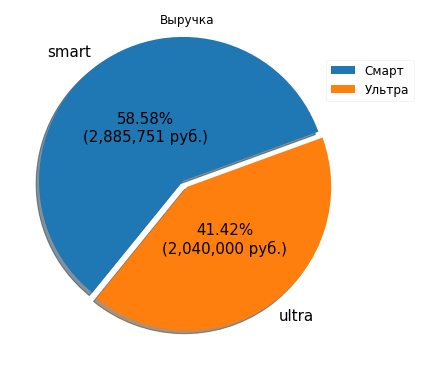

In [77]:
all_revenue = df['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0) 

axes = df.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    
ax.title.set_size(40)
plt.tight_layout(pad=0)

**Вывод**


Тариф Смарт приносит около 58.6% всей выручки, но при этом на него приходится 2200 пользователей. Тариф Ультра дает остальные 41.4%, но эту выручку генерируют всего 1000 пользователей.
Среднему пользователю тарифа Смарт не хватает 2 Гб интернета к заложенными в абонентскую плату 15 Гб и ему приходится дозаказывать эти 2 Гб и доплачивать за них 400 рублей.
Если рассматривать только тех пользователей Смарт, кто вылезает за лимиты по интернет-трафику, то средний размер доп. заказа интернет-трафика равен 3 Гб, за которые они платят 600 рублей.
Таким образом, в тарифной сетке есть дешевый тариф Смарт за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита (418 мин из 500), и есть тариф Ультра, стоимостью 1950 рублей, которым пользуется уже другой класс граждан, где лимитов по всем типам связи предостаточно (иногда дозаказывают в среднем 1 Гб интернета).

"Мегалайну" надо подумать и выработать промежуточное решение, которое позволяло бы клиенту более комфортно, без доп. заказов, пользоваться услугами связи (особенно мобильным интернетом), при этом по цене являлось бы промежуточным вариантом между текущими Смарт и Ультра. Учитывая то, что средний пользователь тарифа Смарт дозаказывает 2 Гб на 400 рублей, т.е. платит в итоге 550 + 400 = 950 рублей за месяц, это значит, что эти деньги клиент готов тратить в месяц в качестве абонентской платы. Например, можно рассмотреть вариант создания тарифа, в дополнение к текущим, под названием " Смарт Ультра", который был бы создан на основе тарифа Смарт, но с пакетом интернет-трафика в 20 Гб и стоимостью 950 рублей. Для большего привлечения внимания к тарифу можно расширить пакет минут и пакет СМС с 500-50 до 750 и 100 соответственно. Компания в плане выручки не потеряет, т.к. средний пользователь не дозаказывает эти услуги, но при этом заставит выглядеть предложение выгодней.